In [54]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

import pandas as pd

import random
import math

## Importing California City Data

In [42]:
city_data = pd.read_csv('/Users/yoarafa/Documents/MachineLearning/california cities/cal_populations_city.csv', sep=',')

In [43]:
coord_data = pd.read_csv('/Users/yoarafa/Documents/MachineLearning/california cities/cal_cities_lat_long.csv', sep=',')

In [44]:
coord_dict = coord_data.set_index('Name').to_dict('index')

In [45]:
def get_lat(row):
    if row['City'] in coord_dict:
        return coord_dict[row['City']]['Latitude']

def get_lon(row):
    if row['City'] in coord_dict:
        return coord_dict[row['City']]['Longitude']

In [46]:
city_data['Lat'] = city_data.apply(get_lat, axis=1)

In [47]:
city_data['Lon'] = city_data.apply(get_lon, axis=1)

In [48]:
city_data

,County,City,Incorportation_date,pop_april_1980,pop_april_1990,pop_april_2000,pop_april_2010,Lat,Lon
0,San Bernardino,Adelanto,1970,2164.0,8517,18130,31765,34.582769,-117.409214
1,Los Angeles,Agoura Hills,1982,NaN,20390,20537,20330,34.153339,-118.761675
2,Alameda,Alameda,1854,63852.0,76459,72259,73812,37.765206,-122.241636
3,Alameda,Albany,1908,15130.0,16327,16444,18539,37.886869,-122.297747
4,Los Angeles,Alhambra,1903,64767.0,82106,85804,83089,34.095286,-118.127014
...,...,...,...,...,...,...,...,...,...
450,Orange,Yorba Linda,1967,28254.0,52422,58918,64234,33.888625,-117.813111
451,Napa,Yountville,1965,2893.0,3259,3297,2933,NaN,NaN
452,Siskiyou,Yreka,1857,5916.0,6948,7290,7765,41.735419,-122.634472
453,Sutter,Yuba City,1908,18736.0,27437,36758,64925,39.140447,-121.616911


In [49]:
city_data = city_data.dropna(subset=['Lat', 'Lon'])

In [51]:
city_data = city_data.reset_index(drop=True)

In [52]:
city_data

,County,City,Incorportation_date,pop_april_1980,pop_april_1990,pop_april_2000,pop_april_2010,Lat,Lon
0,San Bernardino,Adelanto,1970,2164.0,8517,18130,31765,34.582769,-117.409214
1,Los Angeles,Agoura Hills,1982,NaN,20390,20537,20330,34.153339,-118.761675
2,Alameda,Alameda,1854,63852.0,76459,72259,73812,37.765206,-122.241636
3,Alameda,Albany,1908,15130.0,16327,16444,18539,37.886869,-122.297747
4,Los Angeles,Alhambra,1903,64767.0,82106,85804,83089,34.095286,-118.127014
...,...,...,...,...,...,...,...,...,...
429,Yolo,Woodland,1871,30235.0,39802,49151,55468,38.678517,-121.773297
430,Orange,Yorba Linda,1967,28254.0,52422,58918,64234,33.888625,-117.813111
431,Siskiyou,Yreka,1857,5916.0,6948,7290,7765,41.735419,-122.634472
432,Sutter,Yuba City,1908,18736.0,27437,36758,64925,39.140447,-121.616911


In [11]:
city_data.head()

,County,City,Incorportation_date,pop_april_1980,pop_april_1990,pop_april_2000,pop_april_2010
0,San Bernardino,Adelanto,1970,2164.0,8517,18130,31765
1,Los Angeles,Agoura Hills,1982,NaN,20390,20537,20330
2,Alameda,Alameda,1854,63852.0,76459,72259,73812
3,Alameda,Albany,1908,15130.0,16327,16444,18539
4,Los Angeles,Alhambra,1903,64767.0,82106,85804,83089


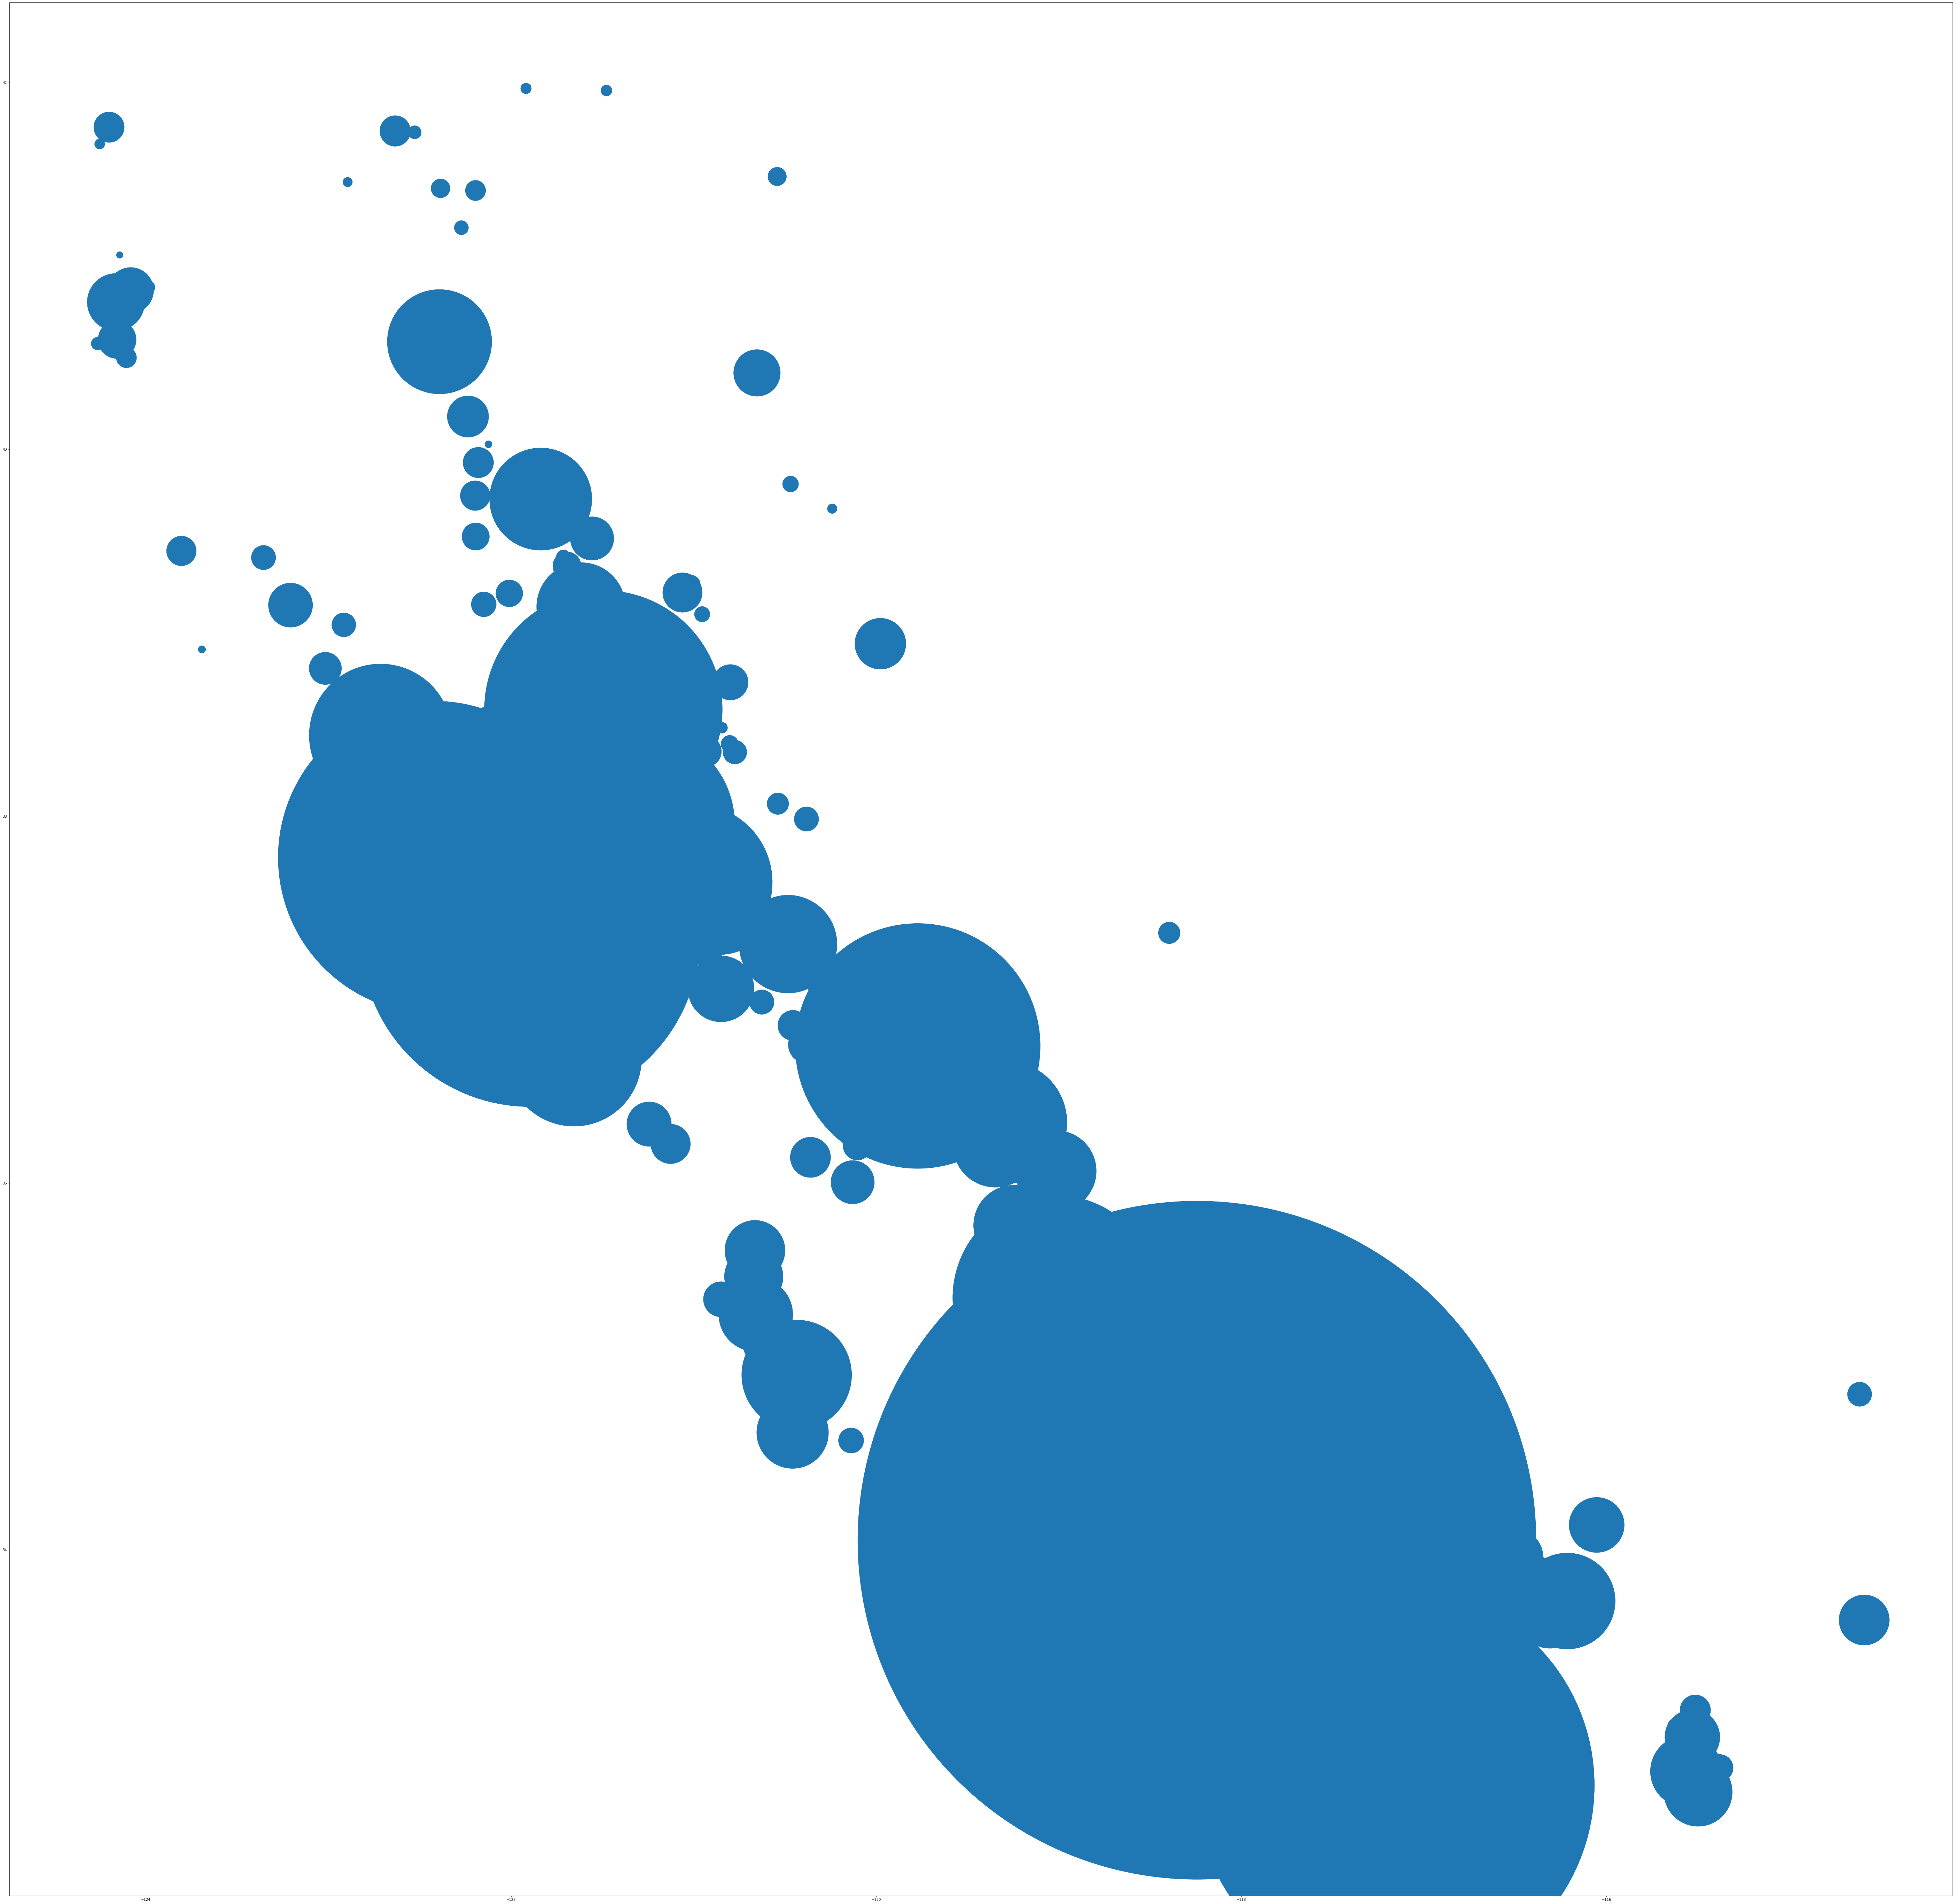

In [56]:
plt.figure(figsize=(100, 100))
plt.scatter(city_data['Lon'], city_data['Lat'], s=city_data['pop_april_2010'])

In [2]:
def closest_centroid(point, centroid_list):
    distances = []
    for center in centroid_list:  # comparing distances from point to each centroid
        dist = math.hypot(*(x[0]-x[1] for x in zip(point, center)))  # https://stackoverflow.com/questions/5228383/how-do-i-find-the-distance-between-two-points
        distances.append(dist)
    val, idx = min((val, idx) for (idx, val) in enumerate(distances))  # https://stackoverflow.com/questions/13300962/python-find-index-of-minimum-item-in-list-of-floats
    return idx  # returns index of centroid closest to point

In [3]:
def average_point(point_list):
    return [sum(x)/len(x) for x in zip(*point_list)]  # https://stackoverflow.com/questions/55153446/getting-the-average-of-a-list-of-coordinates-in-python

In [4]:
def label_points(point_list, centroid_list):  # generates list of the corresponding centroid index for each point
    labels = []
    for point in point_list:
        labels.append(closest_centroid(point, centroid_list))
    return labels

In [5]:
def random_coords(point_list, num_coords):
    min_coords = [min(x) for x in zip(*point_list)]  # finds minimum for each column in point_list
    max_coords = [max(x) for x in zip(*point_list)]
    coords = []
    for i in range(num_coords):
        coords.append(list(random.uniform(x[0], x[1]) for x in zip(min_coords, max_coords)))  # loops through mins and maxs of columns
    return coords

In [6]:
def points_by_label(point_list, label_list, label):  # equivalent point_list[label_list == label] if they were pandas dfs
    points = []
    for i in range(len(point_list)):
        if label_list[i] == label:
            points.append(point_list[i])
    return points

In [7]:
def find_clusters(point_list, num_clusters, num_iters):
    centroid_list = random_coords(point_list, num_clusters)
    for rep in range(num_iters):
        print(centroid_list)
        labels = label_points(point_list, centroid_list)  # assign centroid to each point
        for c in range(len(centroid_list)):  # change each centroid
            centroid_list[c] = average_point(points_by_label(point_list, labels, c))
    return centroid_list, labels